# ***Supervised Machine Learning Models***
Created By
* Alwin Joseph Christopher - 201594340 - sgachri4@liverpool.ac.uk
* Mohamed Muradh Maricair - 201602133 - sgmkader@liverpool.ac.uk

importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
# scikit libraries for data preprocession and model hyper parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# scikit libraries for different classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# visualization libraries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
# libraries to calculate metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import random

load data from the csv file

In [2]:
#Import data from csv file
pima = pd.read_csv('diabetes.csv') # change the path of the file where diabetics.csv is stored

# Data Visualization

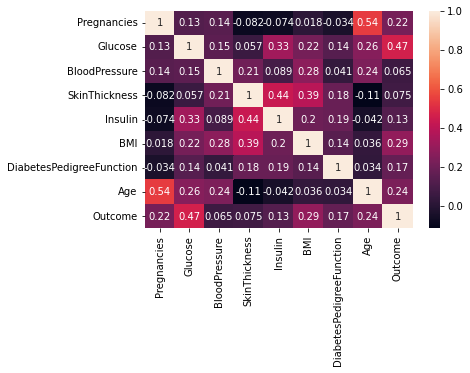

In [3]:
# plot heatmap for the correlation between features - this help finding feature to keep or drop
sns.heatmap(pima.corr(method= 'pearson'),annot = True)

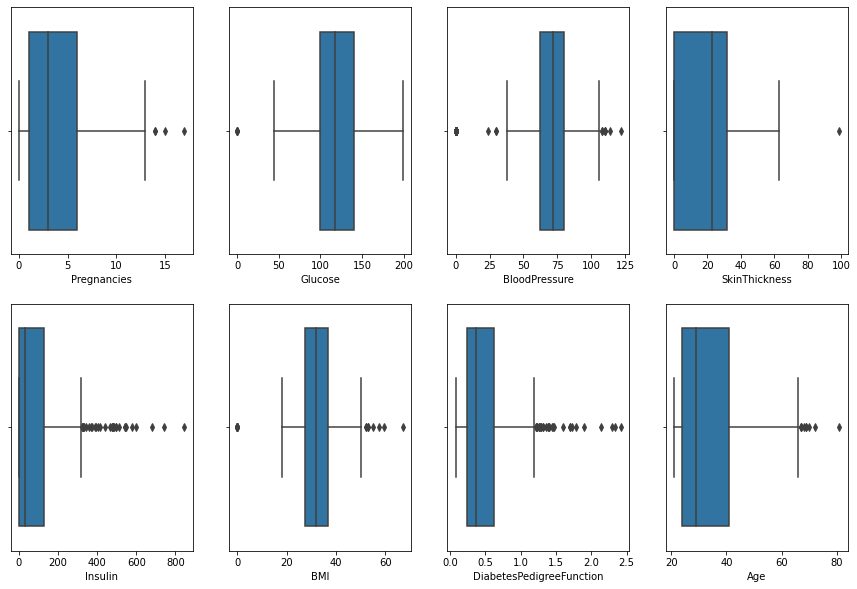

In [ ]:

# pairplotting to visualize the correlation between features of PIMA
#sns.pairplot(pima,hue='Outcome')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
fig,axes = plt.subplots(nrows=2,ncols=4,figsize = (15,10))
for index,col in enumerate(cols):
  
  sns.boxplot(x=col,data = pima, ax = axes.flatten()[index])

### Preprocess the data
cleaning the data

In [4]:
# for features 'BloodPressure','SkinThickness','Glucose','BMI','Insulin' we are replacing zeros with median value
colsTochange = ['BloodPressure','SkinThickness','Glucose','BMI','Insulin']
pima[colsTochange] = pima[colsTochange].replace(0,pima[colsTochange].median())

#Pregnancy-more than 8 are being taken as 8
pima.loc[(pima.Pregnancies>8),'Pregnancies'] = 8

# since Age ranges widely, we are bucketing them into groups of 1 to 5
bins = [0,30,40,50,60,np.inf]
labels =[1,2,3,4,5]
pima['AgeCategory'] = pd.cut(pima['Age'],bins,labels=labels)


In [5]:
#drops the  Age column, since we bucketted it to Age Category colums
pima.drop(['Age'],inplace = True,axis=1)

In [6]:
# converting data frame to numpy ndarrays as X- features and y- class labels
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','AgeCategory']
X = pima.loc[:,cols].values
y = pima.loc[:,'Outcome'].values

# **Split and Train data**

In [7]:
# Splitting data into 75% training and 25% test data:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

In [8]:
# Standardizing the features using scikit Standard Scaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scl = sc.transform(X_train)
X_test_scl = sc.transform(X_test)

# **Grid Search for hyper paramerter tuning**
we chose below models and searched best hyperparameter
1.   Decision Tree - Crierion - Gini or Entropy; Max Depth - range from 1 to 7
2.   K Nearest Neighbor - n_neighbors - range from 3 to 23; weights - uniform or distance; metric - Euclidean, Manhattan, Chebyshev, Minkowski
3.   Logistic Regression - C - 0.25,0.5,0.75,1 





In [9]:
# fix the random number for getting same result
random_number = 42
# list of tuples containing models and their parameter grids
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[random_number]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':list(range(3,23)), 'weights' : ['uniform','distance'],'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'max_depth':list(range(1,7))}])]
# iterate through all models
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy')
    grid.fit(X_train_scl, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    # print the best accuracy and their Parameters
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 76.57%
Best Parameters :  {'C': 0.25, 'random_state': 42}

----------------

KNeighborsClassifier():
Best Accuracy : 77.26%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

----------------

DecisionTreeClassifier():
Best Accuracy : 73.96%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 3}

----------------



# **Defining classifier evaluator function**
* Function inputs y actual, y predicted and for which classifier.
* finds the confusion matrix
* calculates accuracy, precision, recall and f1 score
* plots the heatmap of confusion matrix and prints all metrics score



In [10]:
def evaluateClassifier(y_act,y_pred,classifier):
  """
  y_act - actual class labels
  y_pred - predicted class labels by the classifier
  classifier - string of classifier name

  plots heatmap of confusion matrix and prints all metrics score
  """
  cm = metrics.confusion_matrix(y_act, y_pred)
  arr = []
  arr.append(accuracy_score(y_act,y_pred))
  arr.append(precision_score(y_act,y_pred))
  arr.append(recall_score(y_act,y_pred))
  arr.append(f1_score(y_act,y_pred))
  evDf = pd.DataFrame(np.array(arr).reshape((1,4)),columns =['Accuracy','Precision','Recall','F1 Score'],index=[classifier])
  print(evDf,end='\n\n')

  plt.style.use('seaborn')
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True,
              fmt=".0f",
              linewidths=.5,
              square = True,
              cmap = 'Reds')
  plt.ylabel('Actual label', fontsize = 12)
  plt.xlabel('Predicted label', fontsize = 12)
  plt.title('Accuracy Score for {} : {}%'.format(classifier,round(arr[0]*100,2)), size = 14)
  plt.tick_params(labelsize= 8)


# **Decision Tree**



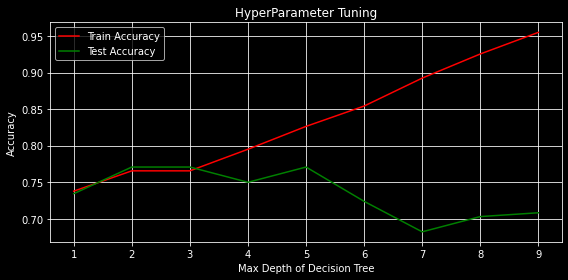

In [12]:
# setting plt style as dark background
plt.style.use('dark_background')
# list of max depth
max_depths = list(range(1,10))
# find test and train accuracy for different max depth value
testAccuracy = []
trainAccuracy = []
for depth in max_depths:
  dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
  dtree.fit(X_train, y_train)
  testAccuracy.append(dtree.score(X_test,y_test))
  trainAccuracy.append(dtree.score(X_train,y_train))

#plot the accuracies to find best max depth
plt.figure(figsize = (8, 4))
plt.plot(max_depths,trainAccuracy,label='Train Accuracy',c='r')
plt.plot(max_depths,testAccuracy,label='Test Accuracy',c='g')
plt.grid()
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('HyperParameter Tuning')
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# from graph above we find max depth = 3 has better accuracy with generalising the model instead of over or underfitting
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_train_pred = dtree.predict(X_train)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Train Accuracy: %.2f' % accuracy_score(y_train_pred, y_train))

Misclassified samples: 44
Test Accuracy: 0.77
Train Accuracy: 0.77


               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.770833   0.745098  0.550725  0.633333



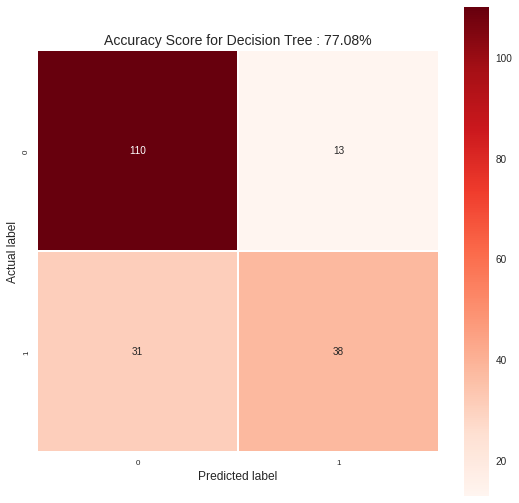

In [14]:
#prints metrics and plots confusion matrix
evaluateClassifier(y_test,y_pred,'Decision Tree')

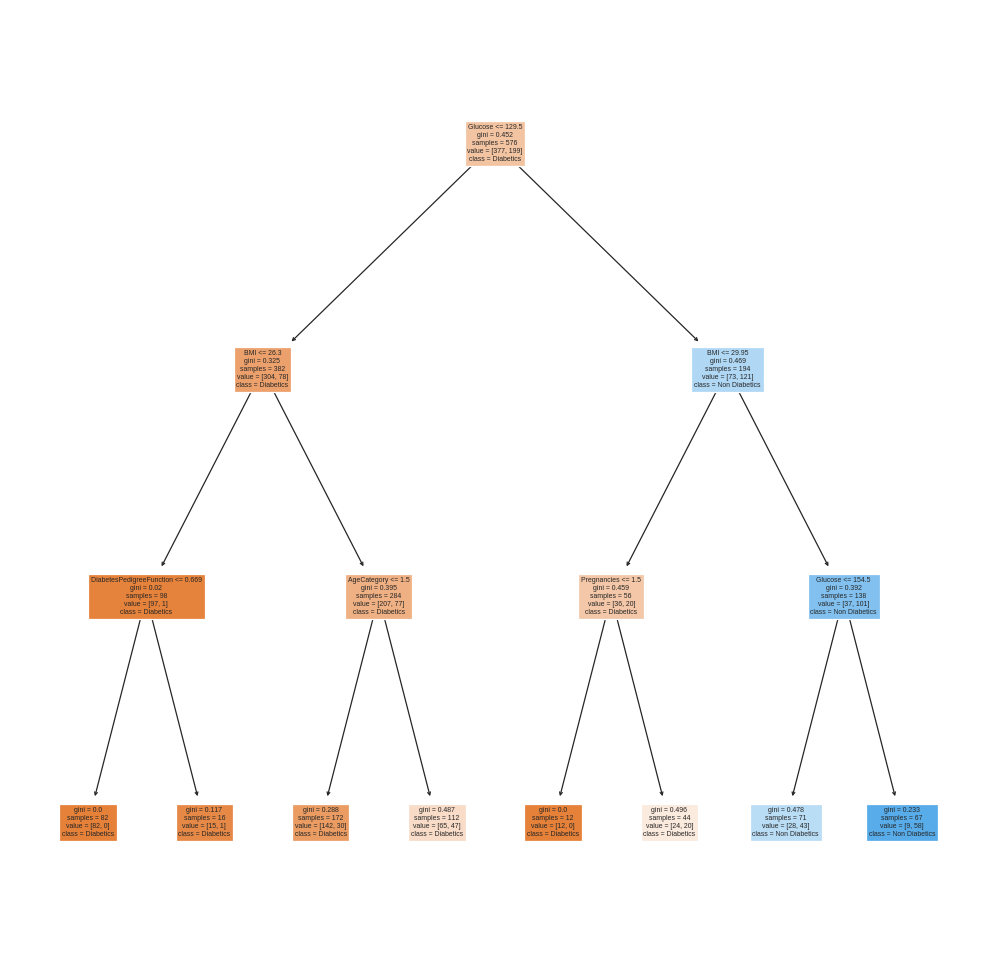

In [15]:
plt.style.use('seaborn')
# Putting the feature names and class names into variables
classNames = ['Diabetics','Non Diabetics']
#get the decision tree plot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtree,
               feature_names = cols, 
               class_names=classNames,
               filled = True);
fig.savefig('decisionForest.png')

In [16]:
# generating the importances of features used by Decision Tree
importances = pd.DataFrame({'feature':cols,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,Glucose,0.600
5,BMI,0.254
7,AgeCategory,0.098
0,Pregnancies,0.047
6,DiabetesPedigreeFunction,0.001
2,BloodPressure,0.000
3,SkinThickness,0.000
4,Insulin,0.000


###K-NearestNeighbours model

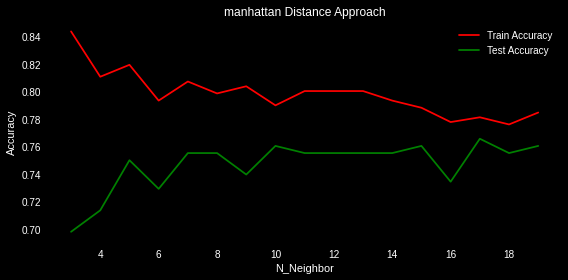

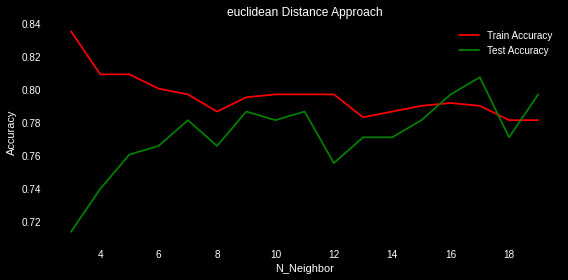

In [17]:
# Hyper paamerter Tuning
plt.style.use('dark_background')

#List of values to try for n_neighbors:
knn_range = list(range(3,20))

# for different metric and Knn range find test and train accuracies
for metric in ['manhattan','euclidean']:
  testAccuracy = []
  trainAccuracy = []
  for nn in knn_range:
    # intialize knn
    knn = KNeighborsClassifier(n_neighbors=nn,metric = metric)
    # train knn model
    knn.fit(X_train_scl, y_train)
    # find test accuracy
    score = knn.score(X_test_scl, y_test)
    testAccuracy.append(score)
    # find train accuracy
    score = knn.score(X_train_scl, y_train)
    trainAccuracy.append(score)

  # plot the graph for each metrics
  plt.figure(figsize = (8, 4))
  plt.plot(knn_range,trainAccuracy,label='Train Accuracy',c='r')
  plt.plot(knn_range,testAccuracy,label='Test Accuracy',c='g')
  plt.grid()
  plt.xlabel('N_Neighbor')
  plt.ylabel('Accuracy')
  plt.title('{} Distance Approach'.format(metric))
  plt.legend()
  plt.tight_layout()
  plt.show()
  

Misclassified samples: 37
Test Accuracy: 0.8072916666666666
Train Accuracy: 0.7899305555555556

                    Accuracy  Precision    Recall  F1 Score
K Nearest Neighbor  0.807292   0.796296  0.623188  0.699187



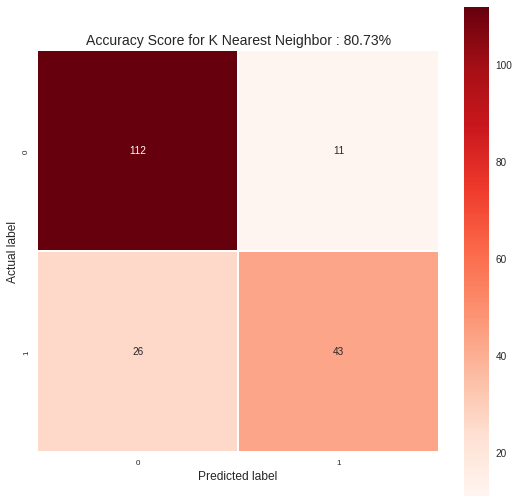

In [19]:
# from above graph we find n_neighbor =13 and euclidean metrics performed best
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scl, y_train)
y_pred = knn.predict(X_test_scl)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Test Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

score = knn.score(X_train_scl, y_train)
print('Train Accuracy: {}'.format(score),end='\n\n')

evaluateClassifier(y_test,y_pred,'K Nearest Neighbor')

# **Logistic Regression**


In [20]:
# we chose C= 1 for logistic regression
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_scl, y_train)
y_pred = lr.predict(X_test_scl)
print(lr.coef_)
print('')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Test Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
score = lr.score(X_train_scl, y_train)
print('Train Accuracy: {}'.format(score))

[[ 0.3900634   1.06647647 -0.15871939 -0.06754895 -0.11745392  0.74917084
   0.19815389  0.18392034]]

Misclassified samples: 41
Test Accuracy: 0.7864583333333334
Train Accuracy: 0.7777777777777778


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.786458       0.75  0.608696     0.672



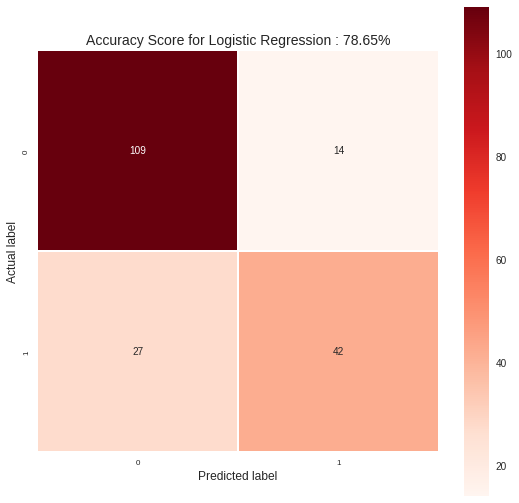

In [21]:
evaluateClassifier(y_test,y_pred,'Logistic Regression')

For plotting data against its Prediction probabilities

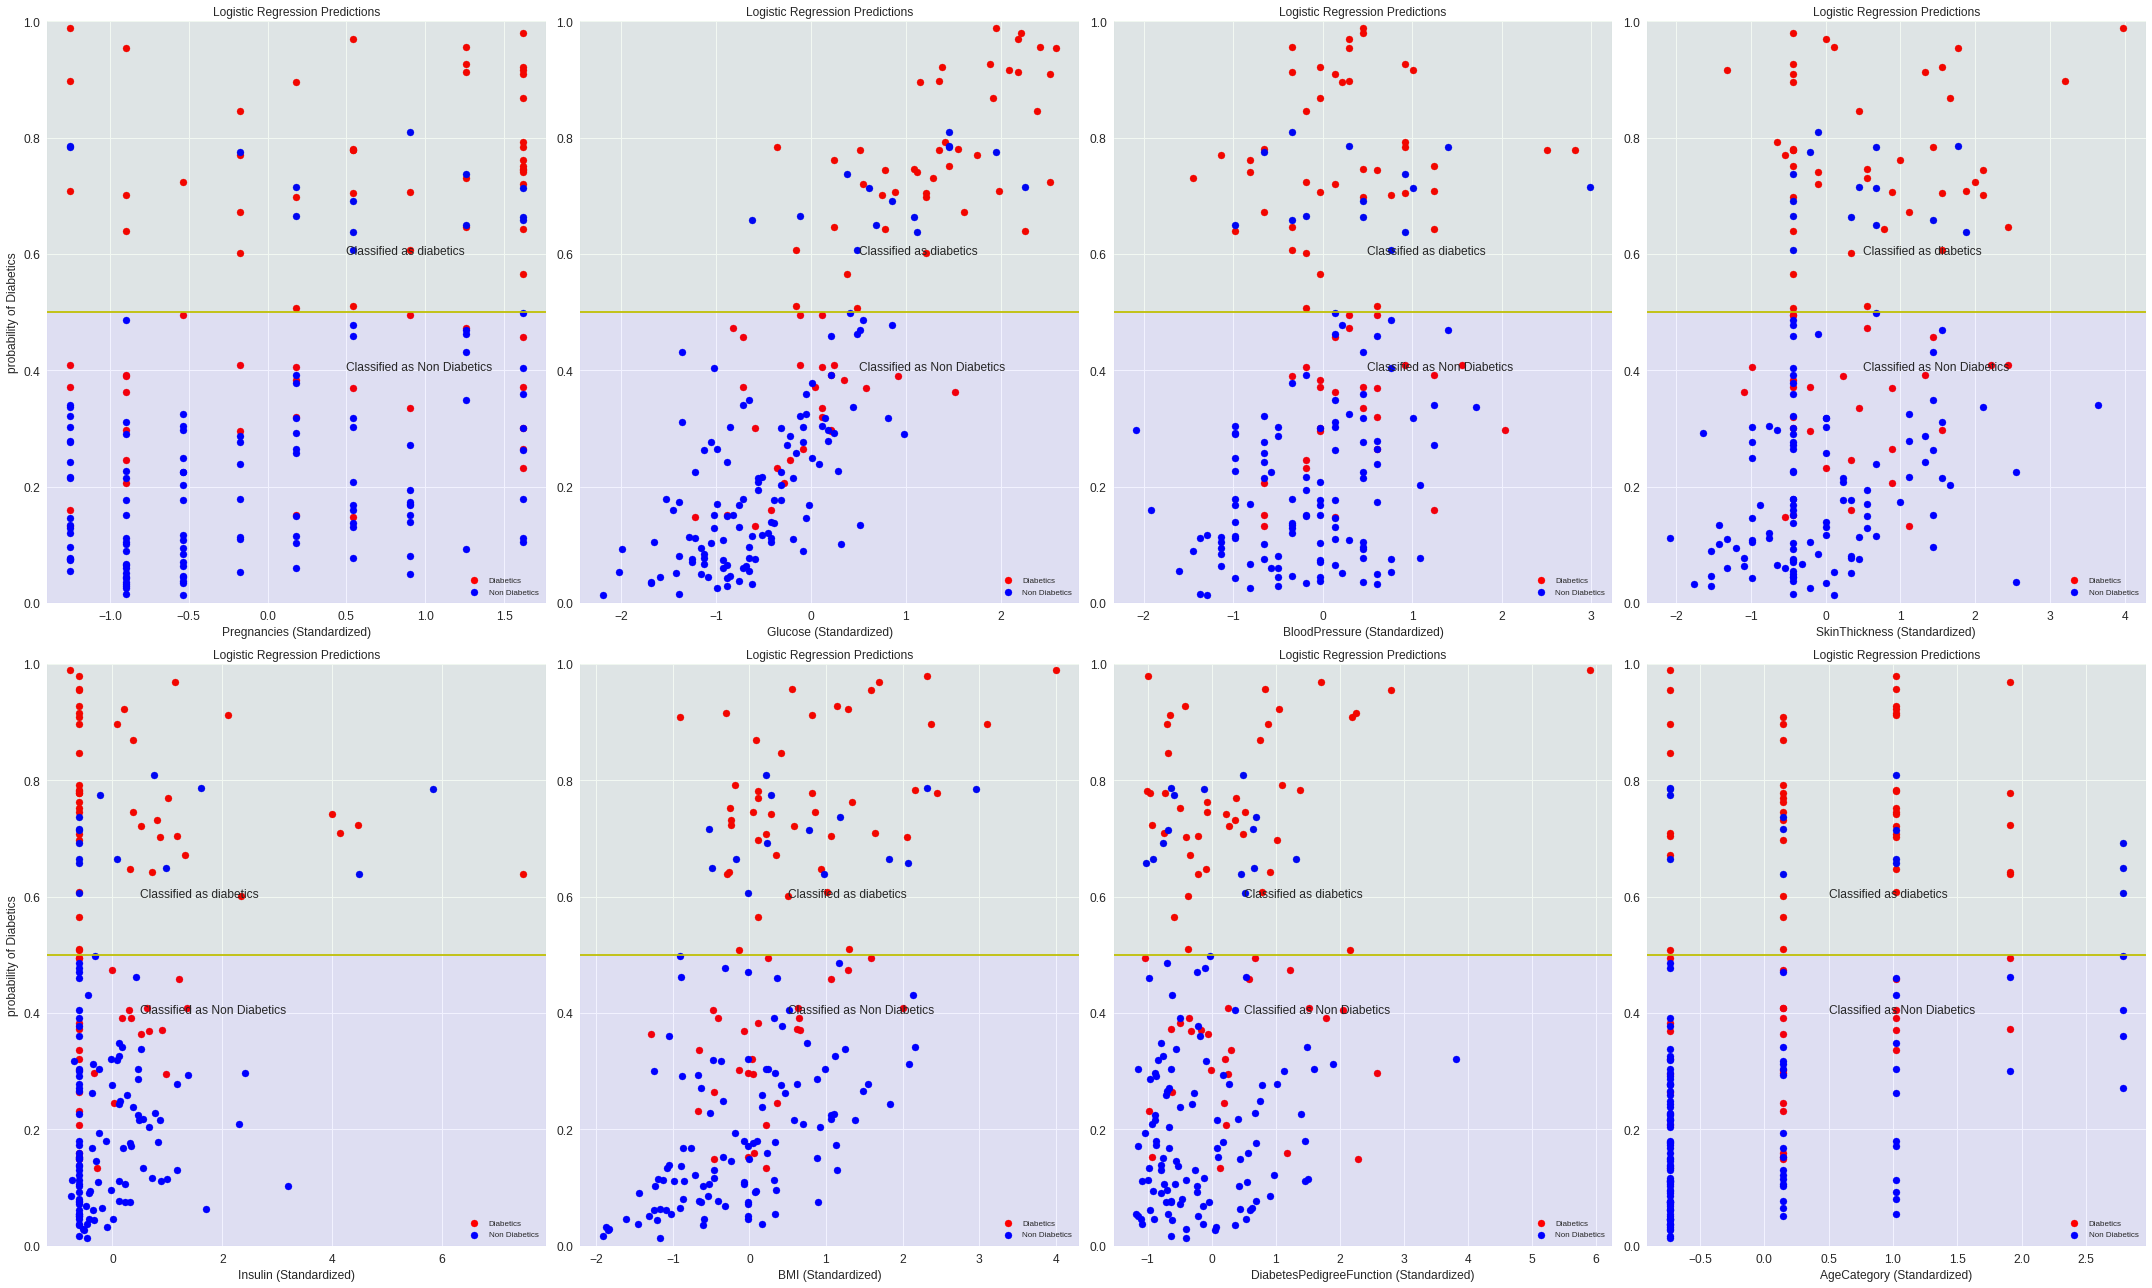

In [22]:
# generate data for plotting from test data set
dataforPlot = pd.DataFrame(X_test_scl,columns=cols)
dataforPlot.loc[:,'Outcome'] = y_test
dataforPlot['logistic_preds'] = pd.DataFrame(lr.predict_proba(X_test_scl))[1]
# get diabetic data
diabeticFilter = dataforPlot['Outcome'] == 1
# get non diabetic data
nonDiabeticFilter = dataforPlot['Outcome'] == 0

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (30,18))
i=0
j=0
# plot probablities against each features
for col in cols:
  if j == 4:
    i+=1
    j = 0
  ax[i][j].scatter(dataforPlot.loc[diabeticFilter, col].values,
              dataforPlot.loc[diabeticFilter, 'logistic_preds'].values,
            color = 'r',
            label = 'Diabetics')


  ax[i][j].scatter(dataforPlot.loc[nonDiabeticFilter, col].values,
              dataforPlot.loc[nonDiabeticFilter, 'logistic_preds'].values,
            color = 'b',
            label = 'Non Diabetics')

  ax[i][j].axhline(y = .5, c = 'y')

  ax[i][j].axhspan(.5, 1, alpha=0.05, color='green')
  ax[i][j].axhspan(0, .4999, alpha=0.05, color='blue')
  ax[i][j].text(0.5, .6, 'Classified as diabetics', fontsize = 12)
  ax[i][j].text(0.5, .4, 'Classified as Non Diabetics', fontsize = 12)

  ax[i][j].set_ylim(0,1)
  ax[i][j].legend(loc = 'lower right', markerscale = 1.0, fontsize = 8)
  ax[i][j].tick_params(labelsize = 12)
  ax[i][j].set_xlabel(col+' (Standardized)', fontsize = 12)
  ax[i][0].set_ylabel('probability of Diabetics', fontsize = 12)
  ax[i][j].set_title('Logistic Regression Predictions', fontsize = 12)
  fig.tight_layout()
  j+=1


# **Logistic Regression with feature - Glucose and BMI**

In [35]:
X = pima.loc[:,['Glucose','BMI']]  #we consider only two input features (Plasma glucose concentration and body mass index)
y = pima.loc[:,'Outcome']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                    random_state=1)
# Standardizing the features:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print(lr.coef_)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % lr.score(X_test_std, y_test))

[[1.07288666 0.61822532]]
Misclassified samples: 42
Accuracy: 0.78
Accuracy: 0.78


                                     Accuracy  Precision   Recall  F1 Score
Logistic Regression With 2 features   0.78125   0.754717  0.57971  0.655738



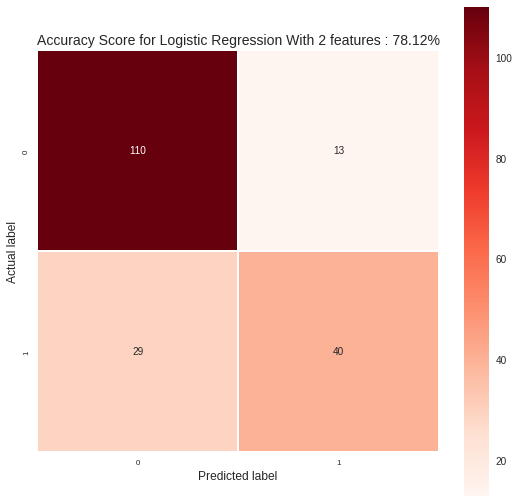

In [38]:
evaluateClassifier(y_test,y_pred,'Logistic Regression With 2 features')

In [39]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:   # # highlight test samples.
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,linewidth=1,
                    marker='o', s=100, label='test set')
    

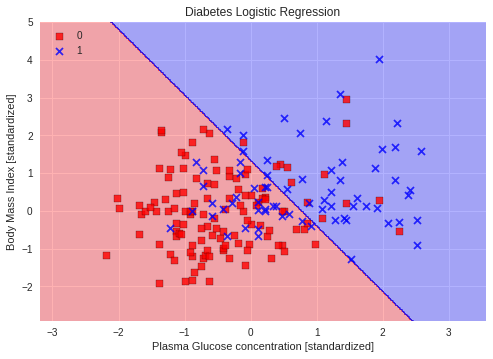

In [40]:
plot_decision_regions(X_test_std, y_test, classifier=lr)

plt.xlabel('Plasma Glucose concentration [standardized]')
plt.ylabel('Body Mass Index [standardized]')

plt.legend(loc='upper left')
plt.title('Diabetes Logistic Regression')
plt.show()